# Lesson 3 - Data cleaning and feature engineering

> How to prepare data for machine learning algorithms and create new, informative features

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/lewtun/dslectures/master?urlpath=lab/tree/notebooks%2Flesson03_data-cleaning.ipynb) 
[![slides](https://img.shields.io/static/v1?label=slides&message=lesson03_data-cleaning.pdf&color=blue&logo=Google-drive)](https://drive.google.com/open?id=1qif0v7ZclsCsjT1efrCAjjUTqZ_KyTIl)

## Learning objectives

* Understand the main steps involved in preparing data for machine learning algorithms
* Create Python functions to automate steps of the data cleaning process
* Gain an introduction to matplotlib's object-oriented interface to combine plots on the same figure

## References

This lesson draws heavily on the following textbook chapter:

* Chapter 2 of _Hands-On Machine Learning with Scikit-Learn and TensorFlow_ by Aurèlien Geron

You may also find the following blog posts useful:

* [Machine Learning with Kaggle: Feature Engineering
](https://www.datacamp.com/community/tutorials/feature-engineering-kaggle)
* Sections 2 and 3 of [Intermediate Machine Learning](https://www.kaggle.com/learn/intermediate-machine-learning) on Kaggle Learn
* [Effectively Using Matplotlib](https://pbpython.com/effective-matplotlib.html) by C. Moffitt

## Homework

* Solve the exercises included in this notebook
* Read chapter 3 of _Data Science for Business_ by Provost & Fawcett

## What is data cleaning?

<div style="text-align: center">
<img src='images/data-cleaning.png' width='250'>
</div>

When you receive a new dataset at the beginning of a project, the first task usually involves some form of data cleaning. 

To solve the task at hand, you might need data from multiple sources which you need to combine into one unified table. However, this is usually a tricky task; the different data sources might have different naming conventions, some of them might be human-generated, while others are automatic system reports. A list of things you usually have to go through are the following:

* Merge multiple sources into one table
* Remove duplicate entries
* Clean corrupted entries
* Handle missing data

In lesson 2, we examined how to merge the table of housing data with their addresses; in this lesson we will focus on the remainign three steps.

Although building algorithms that are able to classify data or estimate outcomes is arguably the most interesting part of data science, data cleaning is the one that takes up most of the time. According to a study by [CrowdFlower](https://www.forbes.com/sites/gilpress/2016/03/23/data-preparation-most-time-consuming-least-enjoyable-data-science-task-survey-says/#67beee196f63), data scientists spend about 60-80% of their time preparing datasets for machine learning algorithms.

<div style="text-align: center">
<img src='images/What-data-scientists-spend-the-most-time-doing.jpg' width='400'>
</div>

## The data

In this lesson we will analyse the unified table of housing data and their addresses that we created in lesson 2:

* `housing_merged.csv`

## Import libraries

As in previous lessons, we will be making use of the pandas and seaborn libraries.

In [1]:
# reload modules before executing user code
%load_ext autoreload
# reload all modules every time before executing the Python code
%autoreload 2
# render plots in notebook
%matplotlib inline

In [2]:
# data wrangling
import pandas as pd
import numpy as np
from pathlib import Path
from dslectures.core import *

# data viz
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# these commands define the color scheme
sns.set(color_codes=True)
sns.set_palette(sns.color_palette('muted'))

## Load the data

As usual, we can download our datasets using our helper function `get_datasets`:

In [3]:
get_dataset('housing_merged.csv')

Dataset already exists at '../data/housing_merged.csv' and is not downloaded again.


We also make use of the `pathlib` library to handle our filepaths:

In [4]:
DATA = Path('../data/')
!ls {DATA}

housing_merged.csv  housing_processed.csv


In [5]:
housing_data = pd.read_csv(DATA/'housing_merged.csv'); housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,street_number,street_name,city,postal_code
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,3130,Grizzly Peak Boulevard,Berkeley,94705.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,2005,Tunnel Road,Oakland,94611.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,6886,Chabot Road,Oakland,94618.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,6365,Florio Street,Oakland,94618.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6365,Florio Street,Oakland,94618.0


## Feature engineering

Before we prepare the data for training machine learning models, it is useful to experiment with creating new _**features**_ (i.e. columns) that may provide more information than the raw data alone. For example the column `total_rooms` refers to the total number of rooms in a housing district, and thus it is more useful to know the number of rooms per household. In pandas, we can create this new column as follows:

In [6]:
housing_data['rooms_per_household'] = housing_data['total_rooms'] / housing_data['households']
# check we have added the column
housing_data.head(1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,street_number,street_name,city,postal_code,rooms_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,3130,Grizzly Peak Boulevard,Berkeley,94705.0,6.984127


---

#### Exercise #1

* Create a new feature called `bedrooms_per_household` from the `total_bedrooms` and `households` features
* Create a new feature called `bedrooms_per_room` from the `total_bedrooms` and `total_rooms` features
* Create a new feature called `population_per_household` from the `population` and `households` features
* Recalculate the correlation matrix from lesson 1 - what can you conclude about the correlation of the new features with the median house value?

---

#### Solution #1 mla

In [7]:
#1.1 to 1.3: mla
housing_data["bedrooms_per_household"] = housing_data["total_bedrooms"] / housing_data["households"];
housing_data["bedrooms_per_room"] = housing_data["total_bedrooms"] / housing_data["total_rooms"];
housing_data["population_per_household"] = housing_data["population"] / housing_data["households"]

housing_data.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,street_number,street_name,city,postal_code,rooms_per_household,bedrooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,3130,Grizzly Peak Boulevard,Berkeley,94705.0,6.984127,1.023810,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,2005,Tunnel Road,Oakland,94611.0,6.238137,0.971880,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,6886,Chabot Road,Oakland,94618.0,8.288136,1.073446,0.129516,2.802260


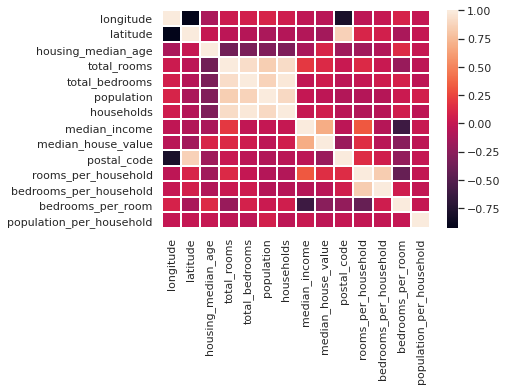

In [8]:
#1.4 mla
correlation_matrix = housing_data.corr()
sns.heatmap(correlation_matrix, fmt = ".2f", linewidths = 1);

In [9]:
correlation_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
bedrooms_per_household     -0.046739
latitude                   -0.144160
postal_code                -0.181029
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

In [10]:
# 1.4 A: All the new feature correlate negatively with the median house value. 

## Remove the housing price cap

Recall from lesson 1 that the quantity we wish to predict (median house value) has a cap around $500,000:

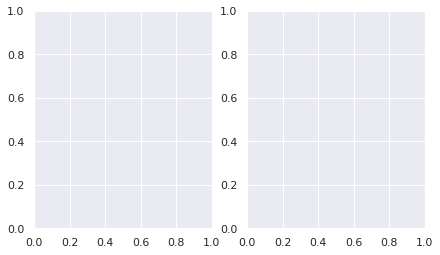

In [11]:
#mla: some examples what just the plt.subplots() function does.
# use plt.subplots() to create multiple plots
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(7, 4))

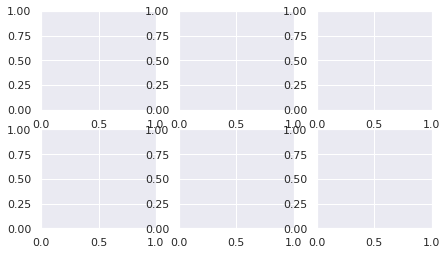

In [12]:
# use plt.subplots() to create multiple plots
fig, (ax0, ax1) = plt.subplots(nrows=2, ncols=3, figsize=(7, 4))

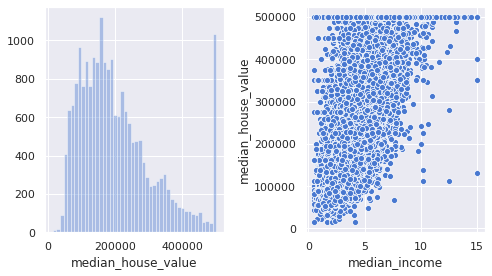

In [13]:
# use plt.subplots() to create multiple plots
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(7, 4))
# put one plot on axis ax0
sns.distplot(housing_data["median_house_value"], kde=False, ax=ax0)
# put second plot on axis ax1
sns.scatterplot("median_income", "median_house_value", data=housing_data, ax=ax1)
# tight_layout() fixes spacing between plots
fig.tight_layout()

> Tip: Up until now, we have always made individual plots to visualise the data. The example above shows how matplotlib can be used to show two plots on the same figure! See the _Effectively Using Matplotlib_ link in the references for more information.

The presence of this cap is potentially problematic since our machine learning algorithms may learn that the housing prices never go beyond that limit. Let's assume that we want to predict housing prices above $500,000, in which case we should remove these districts from the dataset.

---

#### Exercise #2

* Store the number of rows in `housing_data` in a variable called `n_rows_raw`
* Use the `DataFrame.loc[]` method to remove all rows where `median_house_value` is greater than or equal to $500,000
* Calculate the fraction of data that has been removed by this filter.
* Create new histogram and scatter plots to make sure you have removed the capped values correctly.

---

#### Solution #2 mla

In [14]:
housing_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,street_number,street_name,city,postal_code,rooms_per_household,bedrooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,3130,Grizzly Peak Boulevard,Berkeley,94705.0,6.984127,1.023810,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,2005,Tunnel Road,Oakland,94611.0,6.238137,0.971880,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,6886,Chabot Road,Oakland,94618.0,8.288136,1.073446,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,6365,Florio Street,Oakland,94618.0,5.817352,1.073059,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6365,Florio Street,Oakland,94618.0,6.281853,1.081081,0.172096,2.181467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,NaN,Garden Valley Road,Camptonville,95922.0,5.045455,1.133333,0.224625,2.560606
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,NaN,La Porte Road,NaN,95919.0,6.114035,1.315789,0.215208,3.122807
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,16492,Indiana Ranch Road,Dobbins,95935.0,5.205543,1.120092,0.215173,2.325635
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,16345,Vierra Road,Rackerby,95972.0,5.329513,1.171920,0.219892,2.123209


In [15]:
#1.1
n_rows_raw = len(housing_data)

n_rows_raw

20640

In [16]:
#1.2
median_house_value_smaller_500000 = housing_data.loc[housing_data.median_house_value < 500000]

median_house_value_smaller_500000.median_house_value.mean(), housing_data.median_house_value.mean()

(192055.3285830619, 206855.81690891474)

In [17]:
#1.3
n_rows_cleaned = len(median_house_value_smaller_500000)
n_rows_removed = n_rows_raw - n_rows_cleaned

n_rows_removed, n_rows_cleaned

(992, 19648)

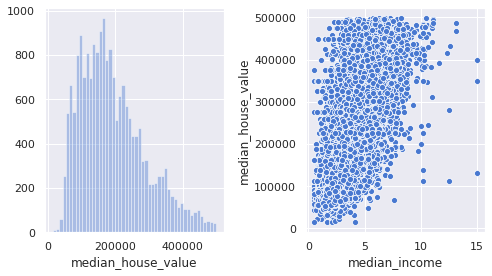

In [18]:
#1.4
# use plt.subplots() to create multiple plots
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(7, 4))
# put one plot on axis ax0
sns.distplot(median_house_value_smaller_500000["median_house_value"], kde=False, ax=ax0)
# put second plot on axis ax1
sns.scatterplot("median_income", "median_house_value", data=median_house_value_smaller_500000, ax=ax1)
# tight_layout() fixes spacing between plots
fig.tight_layout()


-------------------

## Convert strings to categories

#mla: We have to change the strings to categories, because categories we can afterwards change into numbers and we need numbers in the end for building machine learning algorithms. With strings you can not build them.


If we inspect the data types associated with our housing `pandas.DataFrame`

#mla: An object in Pandas is almost always a string. 

In [19]:
housing_data.dtypes

longitude                   float64
latitude                    float64
housing_median_age          float64
total_rooms                 float64
total_bedrooms              float64
population                  float64
households                  float64
median_income               float64
median_house_value          float64
ocean_proximity              object
street_number                object
street_name                  object
city                         object
postal_code                 float64
rooms_per_household         float64
bedrooms_per_household      float64
bedrooms_per_room           float64
population_per_household    float64
dtype: object

we see that in addition to numerical features, we have features of `object` data type, which pandas denotes with the string `O`:

In [20]:
housing_data['ocean_proximity'].dtype

dtype('O')

In [21]:
# compare against numerical column
housing_data['median_house_value'].dtype

dtype('float64')

pandas has a handy set of functions to test the data type of each column. For example, to check whether a column is of object or numeric type we can import the following functions

In [22]:
from pandas.api.types import is_object_dtype, is_numeric_dtype

and then test them against some columns:

In [23]:
is_object_dtype(housing_data['ocean_proximity'])

True

In [24]:
is_numeric_dtype(housing_data['ocean_proximity'])

False

In [25]:
is_numeric_dtype(housing_data['median_house_value'])

True

In this case, we know these columns are _strings_ and some step is needed to convert them to numerical form because most machine learning algorithms are best suited for doing computations on arrays of numbers, not strings.

pandas has a special `Categorical` type for holding data that uses the integer-based categorical representation or **_encoding_**. For example `housing_data['ocean_proximity']` is a `pandas.Series` of Python string objects `['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND']`. We can convert a `pandas.DataFrame` column to categorical as follows:

In [26]:
housing_data['ocean_proximity'] = housing_data['ocean_proximity'].astype('category')

The resulting `Categorical` object has `categories` and `codes` attributes that can be accessed as follows:

In [27]:
housing_data['ocean_proximity'].cat.categories

Index(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'], dtype='object')

In [28]:
housing_data['ocean_proximity'].cat.codes

0        3
1        3
2        3
3        3
4        3
        ..
20635    1
20636    1
20637    1
20638    1
20639    1
Length: 20640, dtype: int8

> Note: pandas will display `Categorical` features as text and treat them internally as numerical.

Sometimes we may want to reorder by hand the categorical variables. For example, with our `ocean_proximity` feature, it makes more sense to order the categories by distance to the ocean:

In [29]:
housing_data["ocean_proximity"].cat.set_categories(
    ["INLAND", "<1H OCEAN", "NEAR BAY", "NEAR OCEAN", "ISLAND"], ordered=True, inplace=True
)

> Tip: Instead of doing each data cleaning step manually, it is a good idea to write functions that automate the process. The main benefits from doing so is that you will be able to reproduce your results at a later date and can reuse the functions in future projects. The exercise below is desiged to help you create your first data cleaning function!

In [30]:
housing_data["ocean_proximity"].cat.categories

Index(['INLAND', '<1H OCEAN', 'NEAR BAY', 'NEAR OCEAN', 'ISLAND'], dtype='object')

---

#### Exercise #3

* Create a function called `convert_strings_to_categories` that takes a `pandas.DataFrame` as an argument and converts all columns of `object` type into `Categorical`. Note that the operation can be done in-place and thus your function should not return any objects. You may find the commands `DataFrame.columns` and `is_numeric_dtype` are useful.
* Check that the transformed `housing_data` has the expected data types.

---

#### Solution #3 mla

In [31]:
housing_data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'street_number', 'street_name',
       'city', 'postal_code', 'rooms_per_household', 'bedrooms_per_household',
       'bedrooms_per_room', 'population_per_household'],
      dtype='object')

In [32]:
is_numeric_dtype(housing_data["total_rooms"])

True

In [33]:
def convert_strings_to_categories(df):
    for col in df.columns:
        if is_object_dtype(df[col]):
            df[col] = df[col].astype("category")
        

## Dealing with missing values

In general, machine learning algorithms will fail to work with missing data, and in general you have three options to handle them:

* Get rid of the corresponding rows
* Get rid of the whole feature or column
* Replace the missing values with some value like zero or the mean, median of the column.

A quick way to check if there's any missing data is to run the pandas `DataFrame.info()` method:

In [34]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   longitude                 20640 non-null  float64 
 1   latitude                  20640 non-null  float64 
 2   housing_median_age        20640 non-null  float64 
 3   total_rooms               20640 non-null  float64 
 4   total_bedrooms            20433 non-null  float64 
 5   population                20640 non-null  float64 
 6   households                20640 non-null  float64 
 7   median_income             20640 non-null  float64 
 8   median_house_value        20640 non-null  float64 
 9   ocean_proximity           20640 non-null  category
 10  street_number             19008 non-null  object  
 11  street_name               20091 non-null  object  
 12  city                      20452 non-null  object  
 13  postal_code               20454 non-null  floa

Since `housing_data` has 20,640 rows we see that the following columns are missing values:

* `total_bedrooms`
* `street_number`
* `street_name`
* `city`
* `postal_code`
* `bedrooms_per_household`
* `bedrooms_per_room`

An alternative way to verify this is to apply the `DataFrame.isnull()` method and calculate the sum of missing values in `housing_data`:

In [35]:
housing_data.isnull().sum()

longitude                      0
latitude                       0
housing_median_age             0
total_rooms                    0
total_bedrooms               207
population                     0
households                     0
median_income                  0
median_house_value             0
ocean_proximity                0
street_number               1632
street_name                  549
city                         188
postal_code                  186
rooms_per_household            0
bedrooms_per_household       207
bedrooms_per_room            207
population_per_household       0
dtype: int64

---

#### Exercise #4

It is often more informative to know the fraction or percentage of missing values in a `pandas.DataFrame`. 

* Calculate the _fraction_ of missing values in `housing_data` and sort them in descending order.
* Use seaborn to create a bar plot that shows the fraction of missing data that you calculated above.

---

#### Solution #4 mla

In [36]:
#4.1
missing_values = (housing_data.isnull().sum() / len(housing_data)).sort_values(ascending=False);

missing_values

street_number               0.079070
street_name                 0.026599
bedrooms_per_household      0.010029
bedrooms_per_room           0.010029
total_bedrooms              0.010029
city                        0.009109
postal_code                 0.009012
population_per_household    0.000000
population                  0.000000
latitude                    0.000000
housing_median_age          0.000000
total_rooms                 0.000000
median_house_value          0.000000
households                  0.000000
median_income               0.000000
ocean_proximity             0.000000
rooms_per_household         0.000000
longitude                   0.000000
dtype: float64

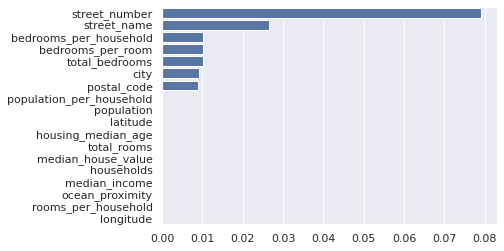

In [37]:
#4.2
barblot_fraction_missing_values = sns.barplot(missing_values.values, missing_values.index, color="b")

In [38]:
barblot_fraction_missing_values

### Getting rid of rows

Let's look at our first option to handle missing data: getting rid of rows. One candidate for this is the `city` column since dropping the 188 rows amounts to less than 1% of the total dataset. To achieve this we can use the `DataFrame.dropna()` method as follows:

In [39]:
housing_data.dropna(subset=['city'], inplace=True)
# check city has no missing values
housing_data['city'].isnull().sum()

0

---

#### Exercise #4

* Use the same technique as above to remove the rows whether the `postal_code` values are missing
* Use the `Series.astype()` method to convert the `postal_code` to `int` type

---

#### Solution #4 mla

In [40]:
#4.1
housing_data.dropna(subset=["postal_code"], inplace=True); housing_data["postal_code"].isnull().sum()

0

In [41]:
#4.2
housing_data["postal_code"].astype(int)

0        94705
1        94611
2        94618
3        94618
4        94618
         ...  
20634    95901
20635    95922
20637    95935
20638    95972
20639    95962
Name: postal_code, Length: 20402, dtype: int64

### Getting rid of whole features

We still have missing values for the categorical features `street_number` and `street_name`. For such data one simple approach is to replace the missing values with the _most frequent entry_. However, for these specific attributes it does not make much sense to replace e.g. the missing street names with the most common ones in some other city.

To that end, we will drop the `street_number` and `street_name` columns.

---

#### Exercise #5

Drop the `street_number`, `street_name` and `postal_code` columns from `housing_data`

---

#### Solution #5 mla

In [42]:
housing_data.drop(columns=["street_number", "street_name"], axis=1, inplace=True)

### Fill missing values

For the numerical columns, let's replace the missing values by the median. 

> Note: We choose the median since it is more robust to outliers than the mean, but in general one should experiment with different combinations.

For example, with `total_bedrooms` this might look like the following:

In [43]:
# calculate median total number of bedrooms
total_bedrooms_median = housing_data['total_bedrooms'].median()
# use inplace=True to make replacement in place
housing_data['total_bedrooms'].fillna(total_bedrooms_median, inplace=True)
# check replacement worked
housing_data['total_bedrooms'].isnull().sum()

0

Although doing this replacement manually for each numerical column is feasible for this small dataset, it would be much better to have a function that automates this process.

---

#### Exercise #6

* Create a function called `fill_missing_values_with_median` that takes a `pandas.DataFrame` as an argument and replaces missing values in each column with the median. Note that the operation can be don in-place, so your function should not return any objects. You may find the command `is_numeric_dtype` to be useful.
* Check that missing values are filled in the transformed `pandas.DataFrame`.

---

In [44]:
# Q: Why are not using if, else functions?

def fill_missing_values_with_median(df):
    for column in df.columns:
        if is_numeric_dtype(df[column]):
            if pd.isnull(df[column]).sum():
                column_median = df[column].median()
                df[column].fillna(column_median, inplace=True)

In [45]:
fill_missing_values_with_median(housing_data); housing_data.isnull().sum()

longitude                   0
latitude                    0
housing_median_age          0
total_rooms                 0
total_bedrooms              0
population                  0
households                  0
median_income               0
median_house_value          0
ocean_proximity             0
city                        0
postal_code                 0
rooms_per_household         0
bedrooms_per_household      0
bedrooms_per_room           0
population_per_household    0
dtype: int64

## Convert categories to numbers

We've now reached the stage where we have a cleaned `pandas.DataFrame` and the final step is to convert our categorical columns to numerical form. For example, we can numericalise the `city` column by replacing the categories with their corresponding codes: 

In [46]:
# add +1 so codes start from 1
housing_data["city"] = housing_data["city"].astype("category")
housing_data['city'] = housing_data['city'].cat.codes + 1
# check output
housing_data.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,city,postal_code,rooms_per_household,bedrooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,70,94705.0,6.984127,1.023810,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,625,94611.0,6.238137,0.971880,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,625,94618.0,8.288136,1.073446,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,625,94618.0,5.817352,1.073059,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,625,94618.0,6.281853,1.081081,0.172096,2.181467


One potential problem with the above representation is that machine learning algorithms will treat two cities that are numerically close to each other as being similar. Thus an alternative approach is to apply a technique known as _one-hot encoding_, where we create a binary feature per category. In pandas we can do this by simply running `pandas.get_dummies()`:

#mla: Notes in OneNote w3!

In [47]:
housing_data = pd.get_dummies(housing_data)
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,city,postal_code,rooms_per_household,bedrooms_per_household,bedrooms_per_room,population_per_household,ocean_proximity_INLAND,ocean_proximity_<1H OCEAN,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,ocean_proximity_ISLAND
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,70,94705.0,6.984127,1.023810,0.146591,2.555556,0,0,1,0,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,625,94611.0,6.238137,0.971880,0.155797,2.109842,0,0,1,0,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,625,94618.0,8.288136,1.073446,0.129516,2.802260,0,0,1,0,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,625,94618.0,5.817352,1.073059,0.184458,2.547945,0,0,1,0,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,625,94618.0,6.281853,1.081081,0.172096,2.181467,0,0,1,0,0


Note that the above has converted our `ocean_proximity` column into one new column per category!

> Note: For columns with hundreds or thousands of categories, one-hot encoding may not be ideal as it will create a large number of columns and slow down the training phase of your analysis. For this reason we did not one-hot encode the `city` or `post_code` columns, even though they are strictly categorical.

In [48]:
# sanity check
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20402 entries, 0 to 20639
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   20402 non-null  float64
 1   latitude                    20402 non-null  float64
 2   housing_median_age          20402 non-null  float64
 3   total_rooms                 20402 non-null  float64
 4   total_bedrooms              20402 non-null  float64
 5   population                  20402 non-null  float64
 6   households                  20402 non-null  float64
 7   median_income               20402 non-null  float64
 8   median_house_value          20402 non-null  float64
 9   city                        20402 non-null  int16  
 10  postal_code                 20402 non-null  float64
 11  rooms_per_household         20402 non-null  float64
 12  bedrooms_per_household      20402 non-null  float64
 13  bedrooms_per_room           204

## Save processed data to disk

In [49]:
# Q: To where do we save this? Is it on the OneDrive?

housing_data.to_csv(DATA/'housing_processed.csv', index=False)
